<a href="https://colab.research.google.com/github/BakMarino/Dados/blob/main/datascienceconectorchave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#Lista de amigos
users = [
    { 'id': 0, 'name': 'Hero' },
    { 'id': 1, 'name': 'Dunn' },
    { 'id': 2, 'name': 'Sue' },
    { 'id': 3, 'name': 'Chi' },
    { 'id': 4, 'name': 'Thor' },
    { 'id': 5, 'name': 'Clive' },
    { 'id': 6, 'name': 'Hicks' },
    { 'id': 7, 'name': 'Devin' },
    { 'id': 8, 'name': 'Kate' },
    { 'id': 9, 'name': 'Klein' }
]

In [ ]:
#relação das amizades 'quem é amigo de quem'
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [ ]:
for user in users:
  user['friends'] = []

for i, j in friendships:
  # nesse caso i é a posição na matriz que pode ser no caso de 0 a 9
  users[i]['friends'].append(users[j]) # adiciona i como amigo de j
  users[j]['friends'].append(users[i]) # adiciona j como amigo de i

In [ ]:
def number_of_friends(user):
  """quantos amigos o usuario tem?"""
  return len(user['friends']) # tamanho da lista de friends_id
total_connections = sum(number_of_friends(user) # o tamanho das lista do "quem é amigo de quem" logo 24 conexões
                            for user in users)

In [ ]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users

In [ ]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
sorted_friends = sorted(num_friends_by_id, key=lambda item: item[1], reverse=True)
print(sorted_friends)

for user_id, num_friends in sorted_friends:
    print(f"User ID: {user_id}, Number of Friends: {num_friends}")

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
User ID: 1, Number of Friends: 3
User ID: 2, Number of Friends: 3
User ID: 3, Number of Friends: 3
User ID: 5, Number of Friends: 3
User ID: 8, Number of Friends: 3
User ID: 0, Number of Friends: 2
User ID: 4, Number of Friends: 2
User ID: 6, Number of Friends: 2
User ID: 7, Number of Friends: 2
User ID: 9, Number of Friends: 1


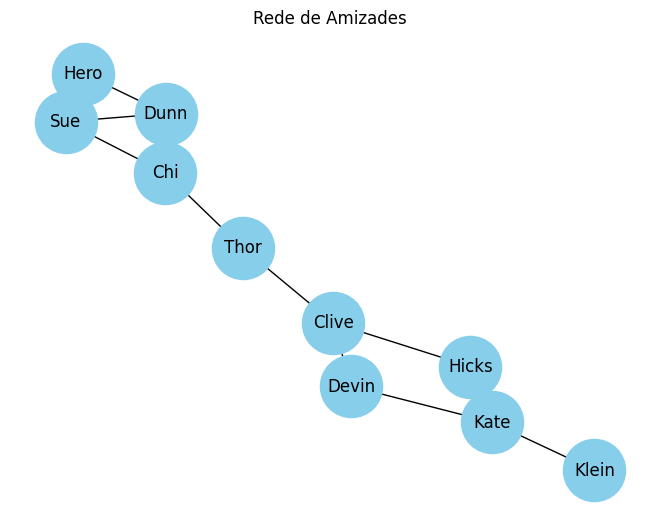

In [ ]:
grafo = nx.Graph()
grafo.add_node('Hero')
grafo.add_node('Dunn')
grafo.add_node('Sue')
grafo.add_node('Chi')
grafo.add_node('Thor')
grafo.add_node('Clive')
grafo.add_node('Hicks')
grafo.add_node('Devin')
grafo.add_node('Kate')
grafo.add_node('Klein')

grafo.add_edge('Hero', 'Dunn') #(0,	1)
grafo.add_edge('Hero', 'Sue') #(0,	2)
grafo.add_edge('Dunn', 'Sue') #(1,	2)
grafo.add_edge('Dunn', 'Chi')#(1,	3)
grafo.add_edge('Sue', 'Chi')#(2,	3)
grafo.add_edge('Chi', 'Thor')#(3,	4)
grafo.add_edge('Thor', 'Clive')#(4,	5)
grafo.add_edge('Clive', 'Hicks')#(5,	6)
grafo.add_edge('Clive', 'Devin')#(5,	7)
grafo.add_edge('Hicks', 'Kate')#(6,	8)
grafo.add_edge('Devin', 'Kate')#(7,	8)
grafo.add_edge('Kate', 'Klein')#(8,	9)

pos = nx.spring_layout(grafo)
nx.draw(grafo, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12)
plt.title('Rede de Amizades')
plt.show()

## Cientistas de dados que talvez vc conheça

In [ ]:
def friends_of_friend_id_bad(users):
  return[foaf['id'] #foaf é abreviação de friends of a friend
         for friend in users['friends']
         for foaf in friend['friends']]

In [ ]:
print([friend['id'] for friend in users[0]['friends']]) #[1,2]
print([friend['id'] for friend in users[1]['friends']]) #[0,2,3]
print([friend['id'] for friend in users[2]['friends']]) #[0,1,3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [ ]:
from collections import Counter

def not_the_same(users, other_user):
  """dois usuarios não são os mesmos se possuem ids diferentes"""
  return users['id'] != other_user['id']

def not_friends(users, other_user):
  """other_user não é um amigo se não estiver em users['friends']"""
  return all(not_the_same(friend, other_user)
             for friend in users['friends'])

def friends_of_friend_id(user):
  return Counter(foaf['id']
                 for friends in user['friends'] #para cada um dos amigos
                 for foaf in friends['friends'] #que contam os amigos dele (A)
                 if not_the_same(user, foaf)    #que não sejam o usuario inicial
                 and not_friends(user, foaf))   #e que não são meus amigos

print(friends_of_friend_id(users[3]))

Counter({0: 2, 5: 1})


In [ ]:
interests = [
    (0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'),
    (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'),
    (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'),
    (1, 'Postgres'), ('2', 'Python'), (2, 'scikit-learn'), (2, 'scipy'),
    (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'),
    (3, 'statistics'), (3, 'regression'), (3, 'probability'),
    (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'),
    (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'),
    (5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'),
    (6, 'probability'), (6, 'mathematics'), (6, 'theory'),
    (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'),
    (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'),
    (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'),
    (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')
]

In [ ]:
def data_scientists_who_like(target_interest):
  return [user_id
          for user_id, user_interest in interest
          if user_interest == target_interest]

In [ ]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)
  interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [ ]:
def most_common_interests_with(user):
  return Counter(interested_user_id
                 for interest in interests_by_user_id[user['id']]
                 for interested_user_id in user_ids_by_interest[interest]
                 if interested_user_id != user['id'])

# SALARIO E EXPERIENCIA

In [ ]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000,4.2)]

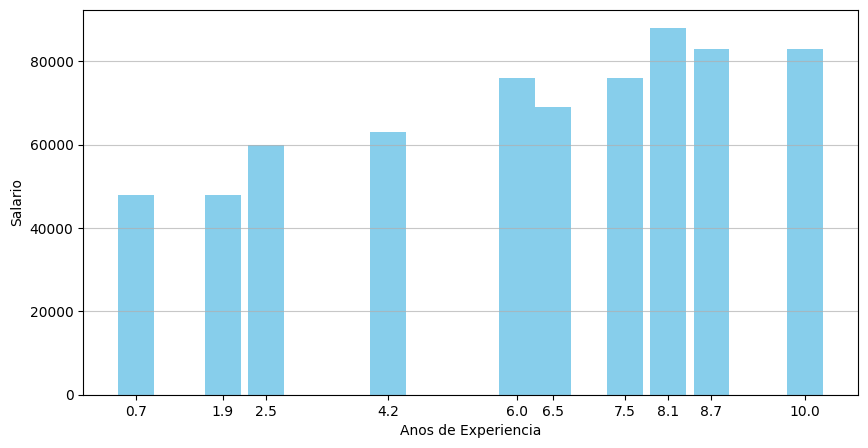

In [ ]:
salaries, tenures = zip(*salaries_and_tenures)

plt.figure(figsize=(10, 5))
plt.bar(tenures, salaries, color='skyblue', width=0.5)
plt.xlabel('Anos de Experiencia')
plt.ylabel('Salario')
plt.xticks(tenures)
plt.grid(axis='y', alpha=0.7)

plt.show()


In [ ]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

  average_salary_by_tenure = {
      tenure: sum(salaries) / len(salaries)
      for tenure, salaries in salary_by_tenure.items()
  }

In [ ]:
def tenure_bucket(tenure):
  if tenure < 2:
        return "menos de dois anos"
  elif tenure < 5:
        return "entre dois e cinco anos"
  else:
        return "mais de cinco anos"

In [ ]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print("Média salarial por tempo de experiência:")
for faixa_experiencia, media_salarial in average_salary_by_bucket.items():
    print(f"{faixa_experiencia}: R$ {media_salarial:.2f}")


Média salarial por tempo de experiência:
mais de cinco anos: R$ 79166.67
menos de dois anos: R$ 48000.00
entre dois e cinco anos: R$ 61500.00


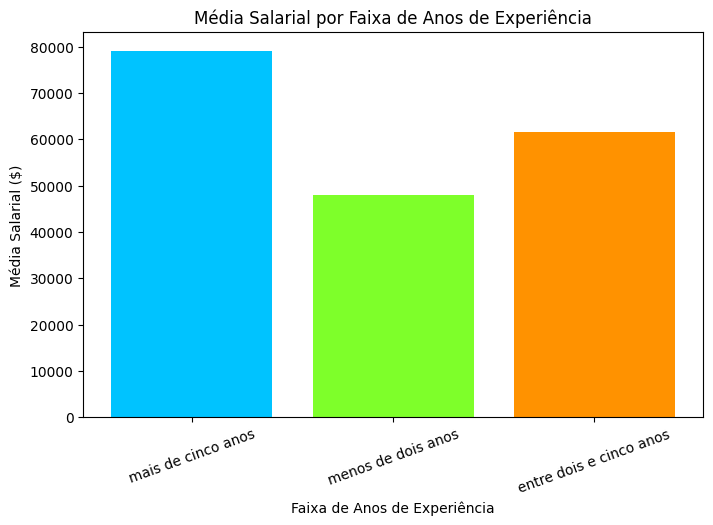

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(average_salary_by_bucket.keys(), average_salary_by_bucket.values(), color=['#00c3ff', '#7EFF2A', '#FF9200'])

plt.xlabel('Faixa de Anos de Experiência')
plt.ylabel('Média Salarial ($)')
plt.title('Média Salarial por Faixa de Anos de Experiência')
plt.xticks(rotation=20)

plt.show()
